# Sales Prediction with Python 

Auther@upenc

Intern at OASIS INFOBYTE

In [143]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline

In [144]:
df = pd.read_csv("Advertising.csv")
df


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [145]:
df = df.drop(columns=['Unnamed: 0'])

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [147]:
df.duplicated().sum()

0

we have our dataset ready with three types of advertising expenditures (TV, radio, and newspaper) and the corresponding sales figures.
* No mssing values.
* No duplicate value

Descriptive Statistics Analysis

In [148]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# EDA


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

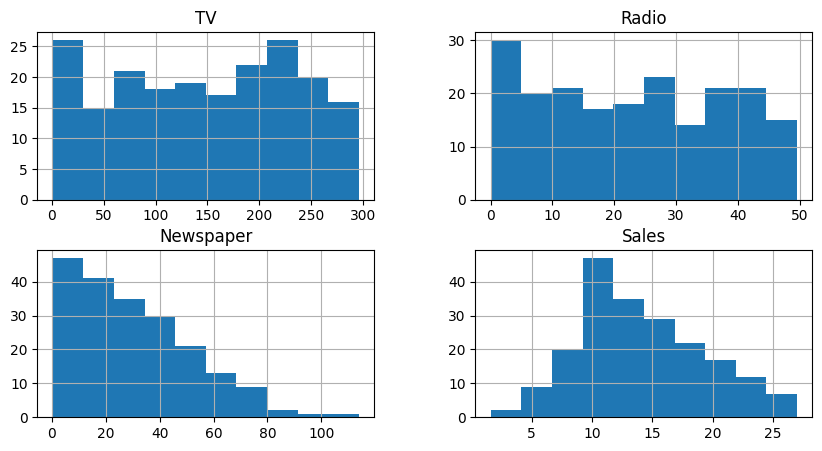

In [149]:
df.hist(figsize=(10,5))

<Axes: >

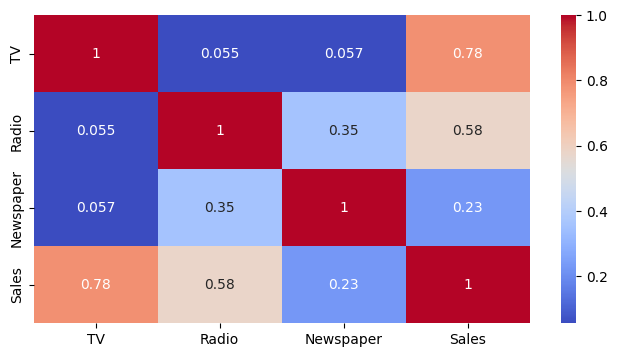

In [150]:
plt.figure(figsize=(8,4))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')

* TV advertising expenditures have a moderately strong positive linear relationship with sales.


<Axes: title={'center': 'TV Advertising vs Sales'}, xlabel='TV', ylabel='Sales'>

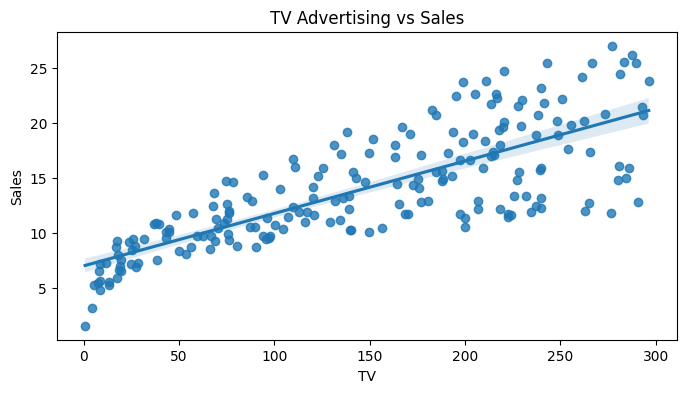

In [151]:
plt.figure(figsize=(8,4))
plt.title('TV Advertising vs Sales')
sns.regplot(x='TV',y="Sales",data=df)

<Axes: title={'center': 'Newspaper Advertising vs Sales'}, xlabel='Newspaper', ylabel='Sales'>

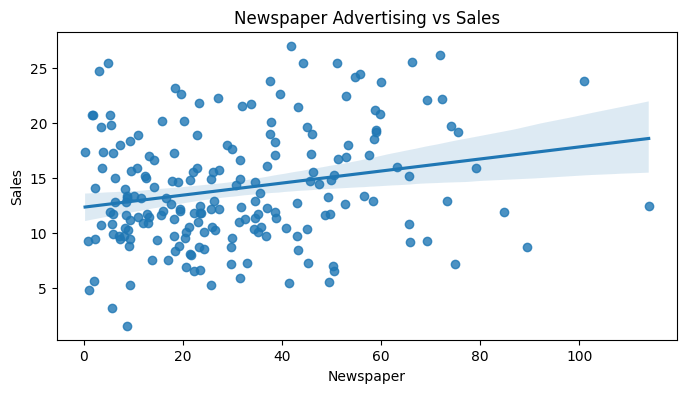

In [152]:
plt.figure(figsize=(8,4))
plt.title('Newspaper Advertising vs Sales')
sns.regplot(x='Newspaper',y="Sales",data=df)

<Axes: title={'center': 'Radio Advertising vs Sales'}, xlabel='Radio', ylabel='Sales'>

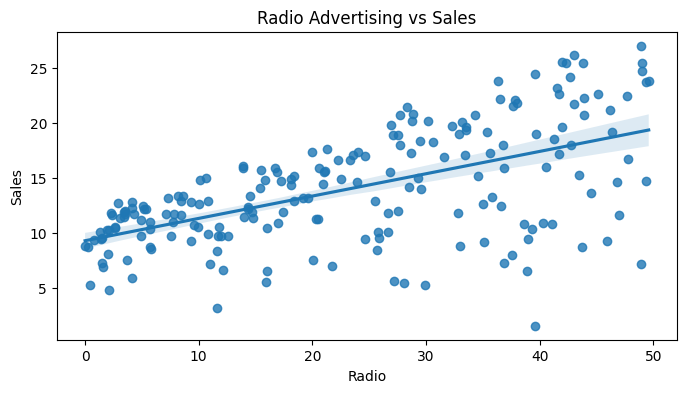

In [153]:
plt.figure(figsize=(8,4))
plt.title('Radio Advertising vs Sales')
sns.regplot(x='Radio',y="Sales",data=df)

# Detecting for outliers

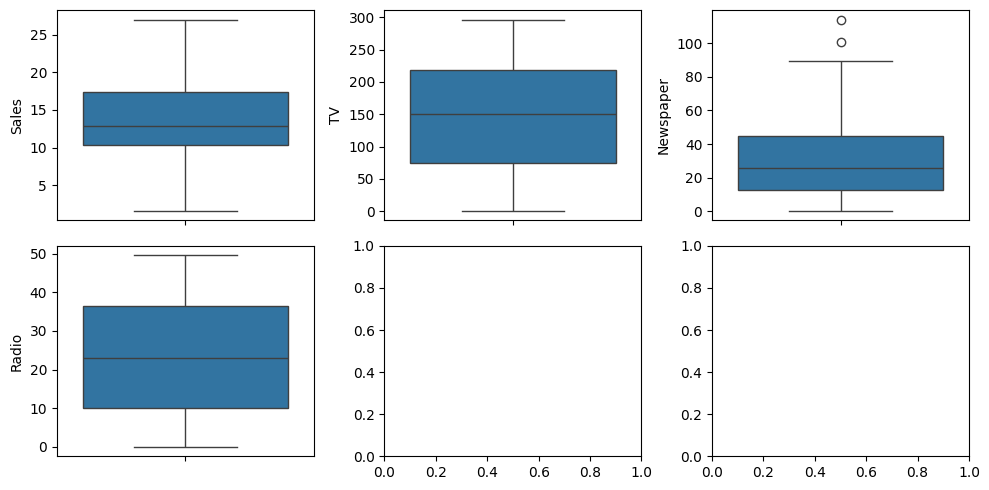

In [154]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['Sales'], ax = axs[0,0])
plt2 = sns.boxplot(df['TV'], ax = axs[0,1])
plt3 = sns.boxplot(df['Newspaper'], ax = axs[0,2])
plt3 = sns.boxplot(df['Radio'], ax = axs[1,0])

plt.tight_layout()

In [155]:
X= np.array(df.drop('Sales', axis=1))
y= np.array(df['Sales']).reshape(-1, 1)
print(X.shape)
print(y.shape)

(200, 3)
(200, 1)


In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [158]:
scaler = StandardScaler()

X_train_s= scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [159]:
model=LinearRegression()
model.fit(X_train_s,y_train)

LinearRegression()

In [160]:
#Fitting the model
y_pred = model.predict(X_test_s)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)

In [161]:
print("Mean Squared Error:", mse)
print("R2 Score:",r2)

Mean Squared Error: 3.174097353976106
R2 Score: 0.8994380241009119


In [162]:
linr = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_pred.flatten()})
linr.head()

,actual,predicted
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373


Text(0.5, 1.0, 'Model Performance')

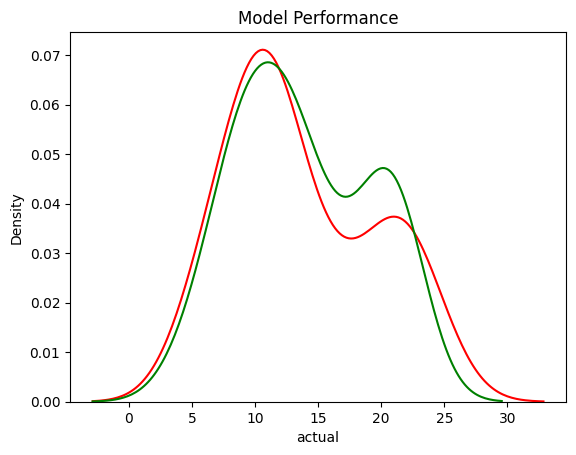

In [163]:
ax = sns.kdeplot(linr['actual'], color='r', label='Actual Price')
sns.kdeplot(linr['predicted'], color='g', label='Predicted Price', ax=ax)
plt.title("Model Performance")

In [164]:
from sklearn.ensemble import RandomForestRegressor

In [165]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [166]:
forest_pred = random_forest.predict(X_test_s)
mse_rf = mean_squared_error(y_test, forest_pred)
r2_rf=r2_score(y_test,forest_pred)


In [167]:
print("Mean Squared Error:", mse_rf)
print("R2 Score:",r2_rf)

Mean Squared Error: 0.5065179000000011
R2 Score: 0.9839524642215368


In [168]:
data_frame = pd.DataFrame({'actual': y_test.flatten(), 'predicted': forest_pred.flatten()})
data_frame.head()

,actual,predicted
0,16.9,17.514
1,22.4,21.616
2,21.4,20.684
3,7.3,6.661
4,24.7,23.101


Text(0.5, 1.0, 'Model Performance')

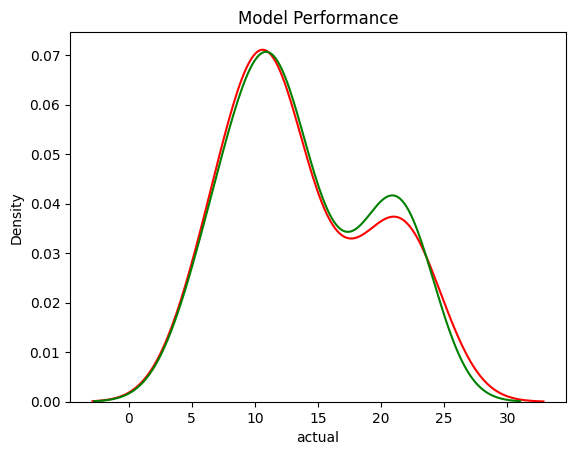

In [169]:
ax = sns.kdeplot(data_frame['actual'], color='r', label='Actual Price')
sns.kdeplot(data_frame['predicted'], color='g', label='Predicted Price', ax=ax)
plt.title("Model Performance")

In [182]:
new_data = pd.DataFrame({'TV': [200], 'Radio': [10], 'Newspaper': [10]})
predicted_sales = random_forest.predict(new_data)
print('Predicted Sales:', predicted_sales)

Predicted Sales: [25.949]
